# Medical Insurance with regression neural network

Regression is a technique for  investigating the relationship between independent variables or features and a dependent variable or outcome. It’s used as a method for predictive modelling in machine learning, in which an algorithm is used to predict continuous outcomes.  


For more abour regression : https://www.seldon.io/machine-learning-regression-explained#:~:text=Regression%20is%20a%20technique%20for,used%20to%20predict%20continuous%20outcomes.

In this notebook we are going to predict the charges(incurance) of a medical hospital by usig few parametres.

In [31]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [32]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [33]:
# Let's convert the object to the categorical value by using the pandas one hot (get_dummies)

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [34]:
# Create an X and Y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [35]:
X.head() , y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [37]:
len(X) , len(y) , len(x_train) , len(x_test) , len(y_train) , len(y_test)

(1338, 1338, 1070, 268, 1070, 268)

In [38]:
# create a neural network

# set random seed
tf.random.set_seed(42)

# create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,name="Input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
])

# compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# fit the model
insurance_model.fit(tf.expand_dims(x_train, axis=-1), y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 13235.9600 - mae: 13235.9600
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 12311.1191 - mae: 12311.1191
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 12173.6699 - mae: 12173.6699
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 12099.2920 - mae: 12099.2920
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 11985.4248 - mae: 11985.4248
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 11799.9385 - mae: 11799.9385
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 11476.8359 - mae: 11476.8359
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 10967.0264 - mae: 10967.0264
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 10350.3008 - mae: 10350.3008
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 9702.670

34/34 [==============================] - 0s 5ms/step - loss: 8346.9932 - mae: 8346.9932
Epoch 83/100
34/34 [==============================] - 0s 4ms/step - loss: 8413.8789 - mae: 8413.8789
Epoch 84/100
34/34 [==============================] - 0s 4ms/step - loss: 8347.1699 - mae: 8347.1699
Epoch 85/100
34/34 [==============================] - 0s 4ms/step - loss: 8373.5107 - mae: 8373.5107
Epoch 86/100
34/34 [==============================] - 0s 4ms/step - loss: 8364.4219 - mae: 8364.4219
Epoch 87/100
34/34 [==============================] - 0s 4ms/step - loss: 8363.0684 - mae: 8363.0684
Epoch 88/100
34/34 [==============================] - 0s 4ms/step - loss: 8353.8975 - mae: 8353.8975
Epoch 89/100
34/34 [==============================] - 0s 4ms/step - loss: 8390.1318 - mae: 8390.1318
Epoch 90/100
34/34 [==============================] - 0s 4ms/step - loss: 8323.3027 - mae: 8323.3027
Epoch 91/100
34/34 [==============================] - 0s 4ms/step - loss: 8355.7266 - mae: 8355.7266
Epo

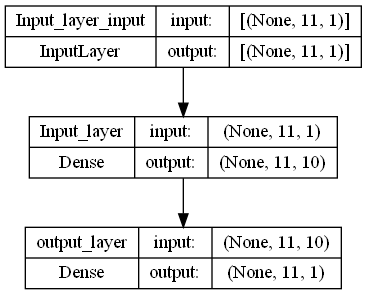

In [39]:
plot_model(insurance_model,show_shapes=True)

In [40]:
y_preds = insurance_model.predict(x_test)
y_preds

9/9 [==============================] - 0s 5ms/step


array([[[17302.307],
        [13789.637],
        [ 9683.401],
        ...,
        [ 9329.033],
        [ 9329.033],
        [ 9329.033]],

       [[15707.651],
        [14648.092],
        [ 9329.033],
        ...,
        [ 9506.218],
        [ 9329.033],
        [ 9329.033]],

       [[20668.8  ],
        [14092.622],
        [ 9329.033],
        ...,
        [ 9506.218],
        [ 9329.033],
        [ 9329.033]],

       ...,

       [[16062.02 ],
        [14294.611],
        [ 9506.218],
        ...,
        [ 9329.033],
        [ 9329.033],
        [ 9329.033]],

       [[18896.963],
        [17729.322],
        [ 9329.033],
        ...,
        [ 9329.033],
        [ 9506.218],
        [ 9329.033]],

       [[18365.41 ],
        [15388.722],
        [ 9506.218],
        ...,
        [ 9329.033],
        [ 9329.033],
        [ 9506.218]]], dtype=float32)

In [41]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [42]:
insurance_model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 8962.0625 - mae: 8962.0625


[8962.0625, 8962.0625]

In [43]:
y_train.median() , y_train.mean()

(9575.4421, 13346.089736364489)

In [44]:
# improving the model by adding more layers
# create a random seed
tf.random.set_seed(42)

# create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile a model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# fit a model

insurance_model_2.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 7ms/step - loss: 13335.7275 - mae: 13335.7275
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13314.8389 - mae: 13314.8389
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 13274.5283 - mae: 13274.5283
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 13199.7256 - mae: 13199.7256
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 13074.9053 - mae: 13074.9053
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 12889.0254 - mae: 12889.0254
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 12651.0088 - mae: 12651.0088
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 12395.2939 - mae: 12395.2939
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 12192.5039 - mae: 12192.5039
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 12110.98

In [45]:
# evaluate on test data
insurance_model_2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 6ms/step - loss: 8627.9668 - mae: 8627.9658


[8627.966796875, 8627.9658203125]

In [46]:
# let's build the same model by using the more number of epochs

# set random seed
tf.random.set_seed(42)

# create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile a model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# fit a model
history = insurance_model_3.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 5ms/step - loss: 13335.7275 - mae: 13335.7275
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13314.8389 - mae: 13314.8389
Epoch 3/200
34/34 [==============================] - 0s 6ms/step - loss: 13274.5283 - mae: 13274.5283
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 13199.7256 - mae: 13199.7256
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 13074.9053 - mae: 13074.9053
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 12889.0254 - mae: 12889.0254
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 12651.0088 - mae: 12651.0088
Epoch 8/200
34/34 [==============================] - 0s 5ms/step - loss: 12395.2939 - mae: 12395.2939
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 12192.5039 - mae: 12192.5039
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 12110.98

34/34 [==============================] - 0s 5ms/step - loss: 8273.6660 - mae: 8273.6660
Epoch 162/200
34/34 [==============================] - 0s 5ms/step - loss: 8274.5918 - mae: 8274.5918
Epoch 163/200
34/34 [==============================] - 0s 6ms/step - loss: 8274.4688 - mae: 8274.4688
Epoch 164/200
34/34 [==============================] - 0s 5ms/step - loss: 8273.9434 - mae: 8273.9434
Epoch 165/200
34/34 [==============================] - 0s 5ms/step - loss: 8276.5996 - mae: 8276.5996
Epoch 166/200
34/34 [==============================] - 0s 5ms/step - loss: 8275.3701 - mae: 8275.3701
Epoch 167/200
34/34 [==============================] - 0s 5ms/step - loss: 8274.4951 - mae: 8274.4951
Epoch 168/200
34/34 [==============================] - 0s 5ms/step - loss: 8274.2354 - mae: 8274.2354
Epoch 169/200
34/34 [==============================] - 0s 5ms/step - loss: 8273.7490 - mae: 8273.7490
Epoch 170/200
34/34 [==============================] - 0s 5ms/step - loss: 8275.1416 - mae: 8275

In [47]:
insurance_model_3.evaluate(x_test,y_test)

9/9 [==============================] - 0s 6ms/step - loss: 8632.0762 - mae: 8632.0762


[8632.076171875, 8632.076171875]

Text(0.5, 0, 'epochs')

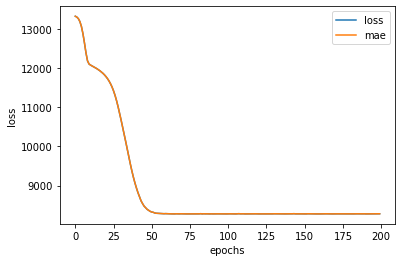

In [48]:
#plot the history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing data (Normalizaton and Standarization)

In terms of normalization neural networks tend to prefer normalization


**What is normalization??**

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.


<AxesSubplot:ylabel='Frequency'>

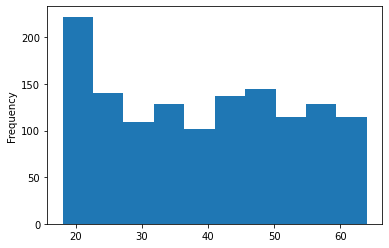

In [49]:
X["age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

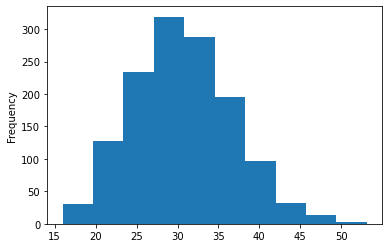

In [50]:
X["bmi"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

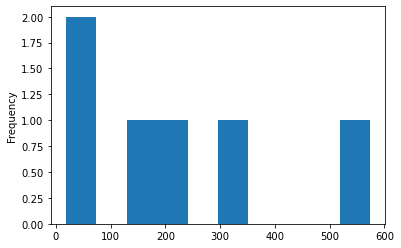

In [51]:
X["children"].value_counts().plot(kind="hist")

In [52]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [53]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi","children"]), # converting into the minmax scalar to the numerical values
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]) # converting to one hot encoder to the non numerical columns
)

# create x and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]


# split the data into training and test dara

x_train , x_test , y_train , y_test = train_test_split(X, y, test_size=0.2)
# fit the column transformer to the training data
ct.fit(x_train)

# change the column transformer by normalization
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [54]:
x_train_normal[0]

array([0.2173913 , 0.35281267, 0.2       , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [55]:
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [56]:
# check the shape of the x train before normalization and after normalization
x_train.shape , x_train_normal.shape

((1070, 6), (1070, 11))

In [57]:
# build the model by using the normalized x_train

# set random seed
tf.random.set_seed(42)

# create a model
model_normal = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile a model
model_normal.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["mae"])


# fit a model
model_normal.fit(x_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 13349.7754 - mae: 13349.7754
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13343.9434 - mae: 13343.9434
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13320.8125 - mae: 13320.8125
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13248.7471 - mae: 13248.7471
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13071.9307 - mae: 13071.9307
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 12707.3877 - mae: 12707.3877
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12052.4033 - mae: 12052.4033
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 11086.7549 - mae: 11086.7549
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 10006.7734 - mae: 10006.7734
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 9043.503

34/34 [==============================] - 0s 4ms/step - loss: 3438.8059 - mae: 3438.8059
Epoch 83/100
34/34 [==============================] - 0s 4ms/step - loss: 3434.8940 - mae: 3434.8940
Epoch 84/100
34/34 [==============================] - 0s 4ms/step - loss: 3428.5288 - mae: 3428.5288
Epoch 85/100
34/34 [==============================] - 0s 4ms/step - loss: 3430.5725 - mae: 3430.5725
Epoch 86/100
34/34 [==============================] - 0s 4ms/step - loss: 3426.5833 - mae: 3426.5833
Epoch 87/100
34/34 [==============================] - 0s 4ms/step - loss: 3422.2766 - mae: 3422.2766
Epoch 88/100
34/34 [==============================] - 0s 4ms/step - loss: 3424.9072 - mae: 3424.9072
Epoch 89/100
34/34 [==============================] - 0s 4ms/step - loss: 3421.3638 - mae: 3421.3638
Epoch 90/100
34/34 [==============================] - 0s 4ms/step - loss: 3414.1582 - mae: 3414.1582
Epoch 91/100
34/34 [==============================] - 0s 4ms/step - loss: 3414.8804 - mae: 3414.8804
Epo

In [58]:
model_normal.evaluate(x_train_normal,y_train)

34/34 [==============================] - 0s 3ms/step - loss: 3407.8044 - mae: 3407.8044


[3407.804443359375, 3407.804443359375]